In [2]:
%load_ext sql


# Connect to CHINOOK database

Conect directly from sqlite folder

In [3]:
%sql sqlite:///C:/sqlite/chinook.db

In [19]:
%%sql
PRAGMA table_info(track);

 * sqlite:///C:/sqlite/chinook.db
Done.


cid,name,type,notnull,dflt_value,pk
0,track_id,INTEGER,1,None,1
1,name,NVARCHAR(200),1,None,0
2,album_id,INTEGER,0,None,0
3,media_type_id,INTEGER,1,None,0
4,genre_id,INTEGER,0,None,0
5,composer,NVARCHAR(220),0,None,0
6,milliseconds,INTEGER,1,None,0
7,bytes,INTEGER,0,None,0
8,unit_price,"NUMERIC(10,2)",1,None,0


# 1) Introduction

In this lesson, we'll explore **aggregate functions**. The following table summarizes the main two differences between scalar and aggregate functions:
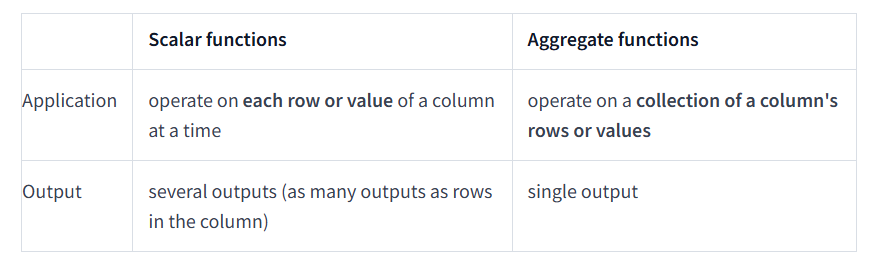

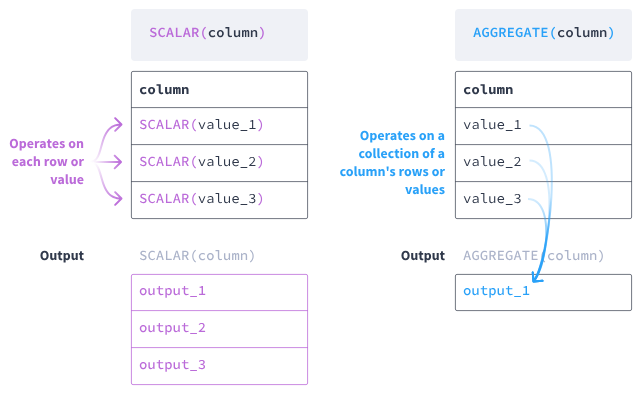

In this lesson we'll use the **Chinook** database. This database contains information about a **fictional digital music shop** — like an iTunes store.

## Instructions

Write a query that displays the table `invoice`.

Use the clauses SELECT, FROM, and LIMIT.

In [5]:
%%sql
SELECT *
  FROM invoice
LIMIT 3

 * sqlite:///C:/sqlite/chinook.db
Done.


invoice_id,customer_id,invoice_date,billing_address,billing_city,billing_state,billing_country,billing_postal_code,total
1,18,2017-01-03 00:00:00,627 Broadway,New York,NY,USA,10012-2612,15.84
2,30,2017-01-03 00:00:00,230 Elgin Street,Ottawa,ON,Canada,K2P 1L7,9.9
3,40,2017-01-05 00:00:00,"8, Rue Hanovre",Paris,None,France,75002,1.98


# 2) Column Sum

The first aggregation function (also called an aggregate function) we'll explore is the `SUM` function. It allows us to sum all the rows of a given column by adding the column values by row. The result is a single value.

```sql
SELECT SUM(total)
    FROM example;
```

## Instructions

1. Write a query that uses the `SUM` aggregate function to calculate the sum of all values in the `total` column from the `invoice` table.

1. Rename the result as `overall_sale`.

In [6]:
%%sql

SELECT SUM(total) as overall_sale
FROM invoice


 * sqlite:///C:/sqlite/chinook.db
Done.


overall_sale
4709.43


# 3) Column Average

We use the `AVG` aggregate function to calculate a column's rows average. (The mean is the same as the average.)

`AVG` aggregate function is similar to the `SUM` one. We can apply them to any numeric column.

Computing an average of a column consists of summing its values (as with the `SUM` aggregate function) and dividing the result by the number of values.

## Instructions

1. Write a query that uses the `AVG` aggregate function to calculate the average value of the `total` column from the `invoice` table.

1. Rename the result as `avg_sale`.

In [7]:
%%sql

SELECT AVG(total) as avg_sale
FROM invoice

 * sqlite:///C:/sqlite/chinook.db
Done.


avg_sale
7.670081433224756


# 4) Minimum and Maximum Values in a Numeric Column

```sql

SELECT MIN(total) AS min_sale
  FROM example;

SELECT MAX(total) AS max_sale
FROM example;

```

# 5) First and Last Values in a Text Column

We can also use the `MIN` and `MAX` aggregation functions for text columns. While the minimum and maximum are interesting for numeric columns, you might wonder how they're relevant to a text column.

Sometimes, we are looking for the first column's value if this column is ordered alphabetically. This value is not necessarily the first value of the column. For example, from our example table, the first billing country is `Canada`, if `billing_country` is ordered alphabetically.

```sql
SELECT MIN(billing_country) AS first_billing_country
  FROM example;
```

## Instructions

1. Write a query that uses the `MAX` aggregate function to display the last country (in alphabetical order) in the `billing_country` column of the `invoice` table.

1. Rename the result as `last_billing_country`.

In [8]:
%%sql
SELECT MAX(billing_country) as last_billing_country
FROM invoice

 * sqlite:///C:/sqlite/chinook.db
Done.


last_billing_country
United Kingdom


# 6) Counting ROWs of a table

On this screen, we'll see that the COUNT aggregate function is an exception to this rule because it applies directly to the rows. It allows counting the rows in a table.

Let's use the `COUNT` aggregate function to count the rows in the example table.

```sql
SELECT COUNT(*) AS num_row
  FROM example;
```
> Note the use of the wildcard *. This query displays 3, the number of rows in a given table. At this level, we don't need to specify a column.

## Instructions

1. Write a query that uses the `COUNT` aggregate function to calculate the total number of rows in the invoice table.

1. Rename the result as `num_rows`.

In [10]:
%%sql
SELECT COUNT(*) as num_rows
FROM invoice

 * sqlite:///C:/sqlite/chinook.db
Done.


num_rows
614


# 7) Counting Rows with Missing Values

Our database contains other tables as well. For example, the `track` table contains all the song tracks available in the store with various pieces of information. Here are its first three rows:

In [11]:
%%sql
select *
from track
LIMIT 3

 * sqlite:///C:/sqlite/chinook.db
Done.


track_id,name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price
1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Hoffman",230619,3990994,0.99


Let's look again at the track first rows, especially the `composer` column. Notice that the second row's value is empty. Sometimes some values are missing in a column. SQL replaces these values with `NULL` (which means empty). So, counting rows doesn't necessarily reflect the number of non-empty values in a given column. 

To get this information, we can use the same `COUNT` aggregate function. However, in this case, we have to **specify** the column name in the `COUNT` function.

For example, we can count non-empty tracks' `names` as follows:

In [12]:
%%sql
SELECT COUNT(name) AS num_track_name 
  FROM track;

 * sqlite:///C:/sqlite/chinook.db
Done.


num_track_name
3503


We get `3503`, the same number as `COUNT(*)`. That means the name column doesn't have empty values.

So, the difference between `COUNT(*)` and `COUNT(column)` is that all the table's rows are counted in the first case. 

In the second case, **only the non-null values of the specified column are counted**.

## Instructions

1. Write a query that uses the `COUNT` aggregate function to calculate the total number of non-null values in `composer` column from the `track` table.

1. Rename the result as `num_composers`.

In [15]:
%%sql
SELECT COUNT(composer) as num_composers
FROM track


 * sqlite:///C:/sqlite/chinook.db
Done.


num_composers
2525
